In [1]:
import pandas as pd
import matplotlib
import glob
from matplotlib.ticker import MultipleLocator

%pylab inline
%matplotlib widget

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def report(files, ax, legend_loc='upper left', SKIP=1):
    for file in files:
        data = pd.read_csv(file)
        results = (data['received_ts'] - data['sent_ts']) * 1e-3
        ax.scatter(results.index[::SKIP], results[::SKIP], s=1, alpha=.5, label=file)

    ax.hlines(results.mean(), 0, results.index[-1], linestyle="--", color="r", label='mean')
    ax.hlines(results.quantile(q=0.01), 0, results.index[-1], linestyle="--", color="b", label='q.01')
    ax.hlines(results.quantile(q=0.99), 0, results.index[-1], linestyle="--", color="g", label='q.99')
    ax.hlines(results.quantile(q=0.999), 0, results.index[-1], linestyle=":", color="g", label='q.999')
    ax.text(9.1e5, results.mean(), f"{results.mean():.2f}µs", fontsize=12, va="center")
    ax.text(9.1e5, results.quantile(q=0.01), f"{results.quantile(q=0.01):.2f}µs", fontsize=12, va="center")
    ax.text(9.1e5, results.quantile(q=0.99), f"{results.quantile(q=0.99):.2f}µs", fontsize=12, va="center")
    ax.text(9.1e5, results.quantile(q=0.999), f"{results.quantile(q=0.999):.2f}µs", fontsize=12, va="center")
    ax.set_xlim(4e5, 9e5)
    ax.set_ylim(1, 20)
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_formatter('{x:.0f}µs')
    ax.yaxis.set_minor_formatter('')
    ax.legend(loc=legend_loc, shadow=True)

Text(0.5, 1.0, 'blocking loop')

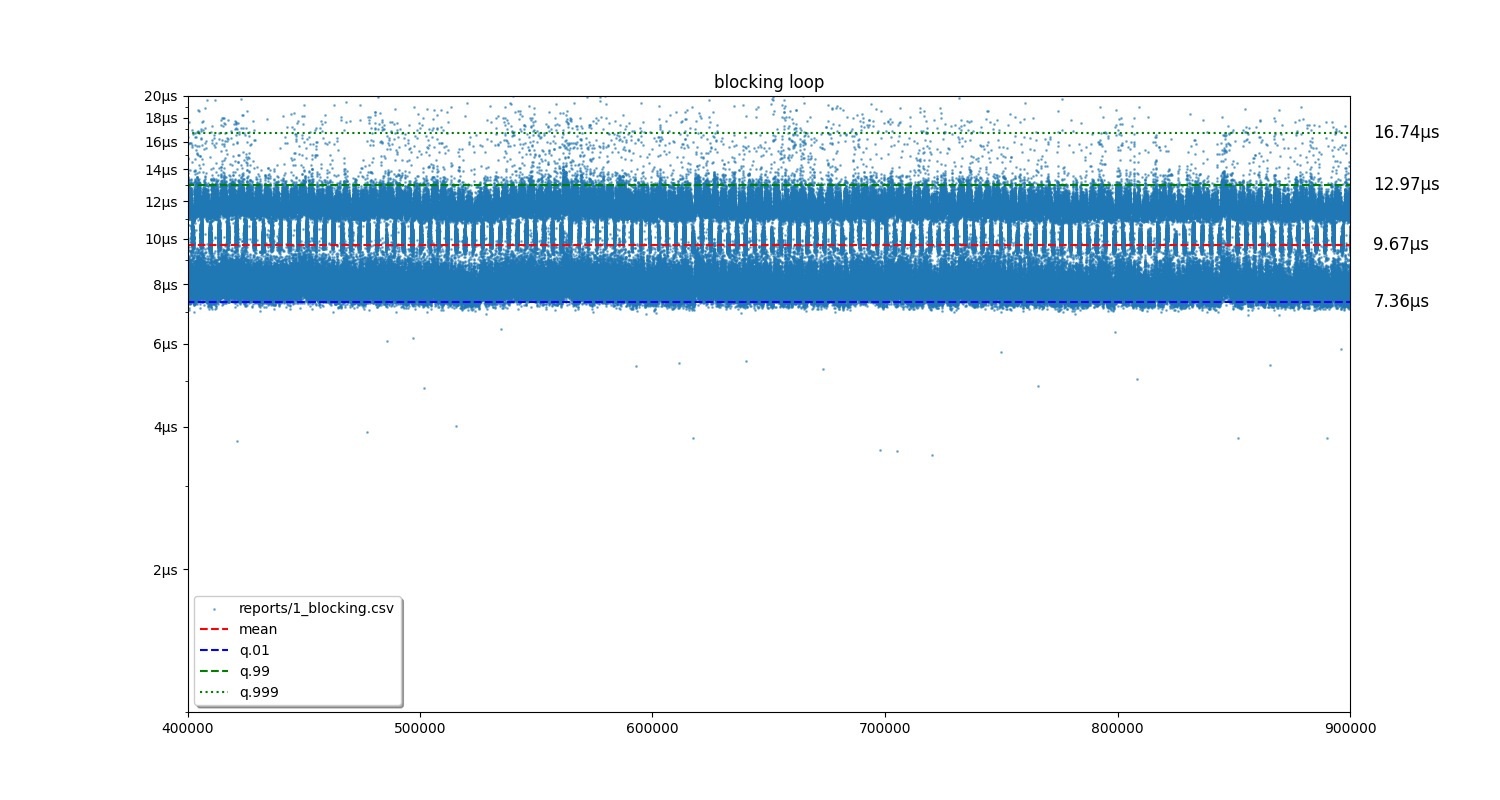

In [3]:
fig, ax = subplots(1,1,figsize=(15,8), sharey=True)

report(glob.glob("reports/1*blocking.csv"), ax, legend_loc='lower left')
ax.set_title("blocking loop")

Text(0.5, 1.0, 'blocking loop pinned to core')

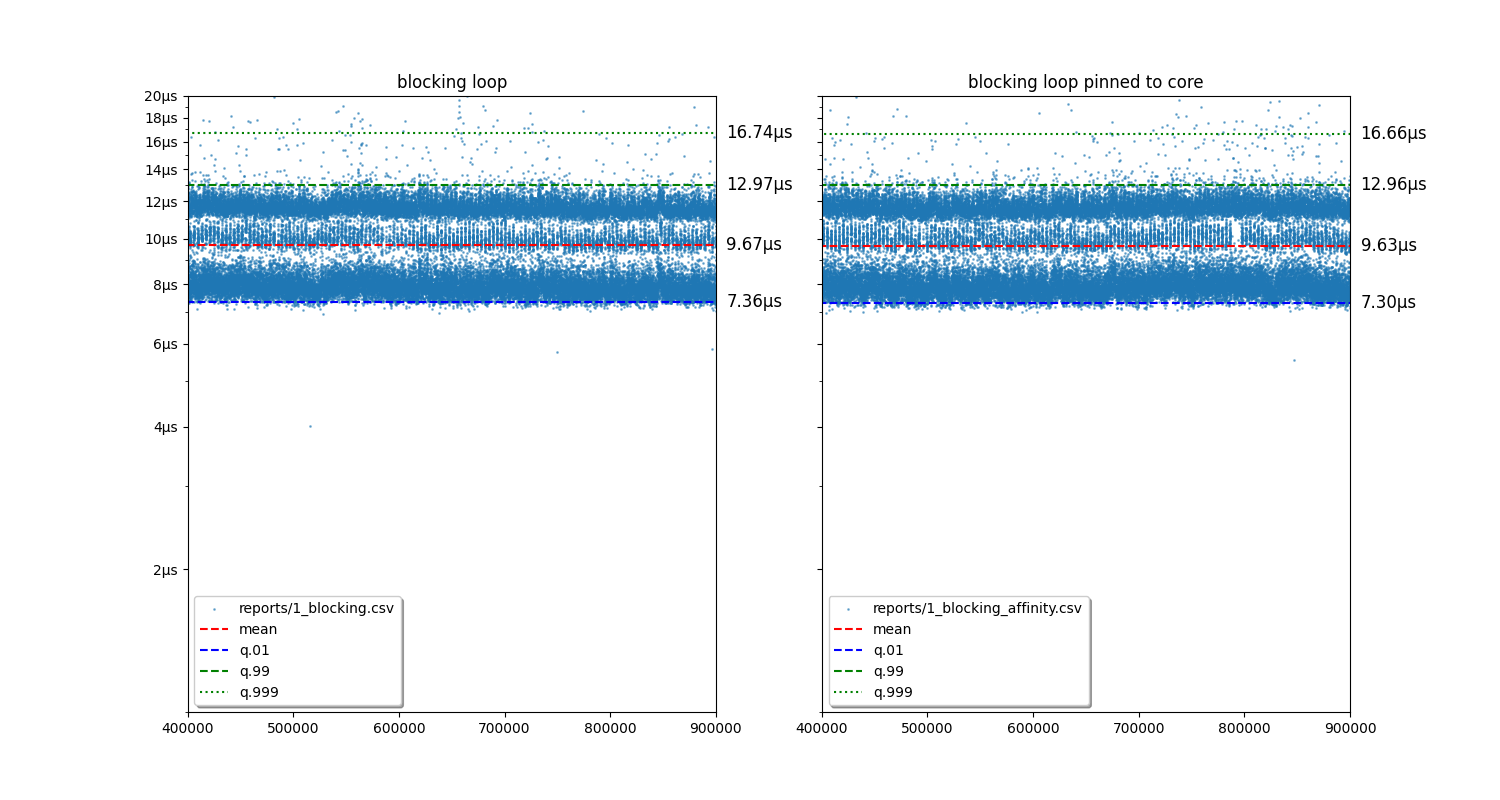

In [4]:
fig, ax = subplots(1,2,figsize=(15,8), sharey=True)

report(glob.glob("reports/1*blocking.csv"), ax[0], legend_loc='lower left', SKIP=10)
ax[0].set_title("blocking loop")
report(glob.glob("reports/1*blocking_affinity.csv"), ax[1], legend_loc='lower left', SKIP=10)
ax[1].set_title("blocking loop pinned to core")

Text(0.5, 1.0, 'cooperative scheduling pinned to core')

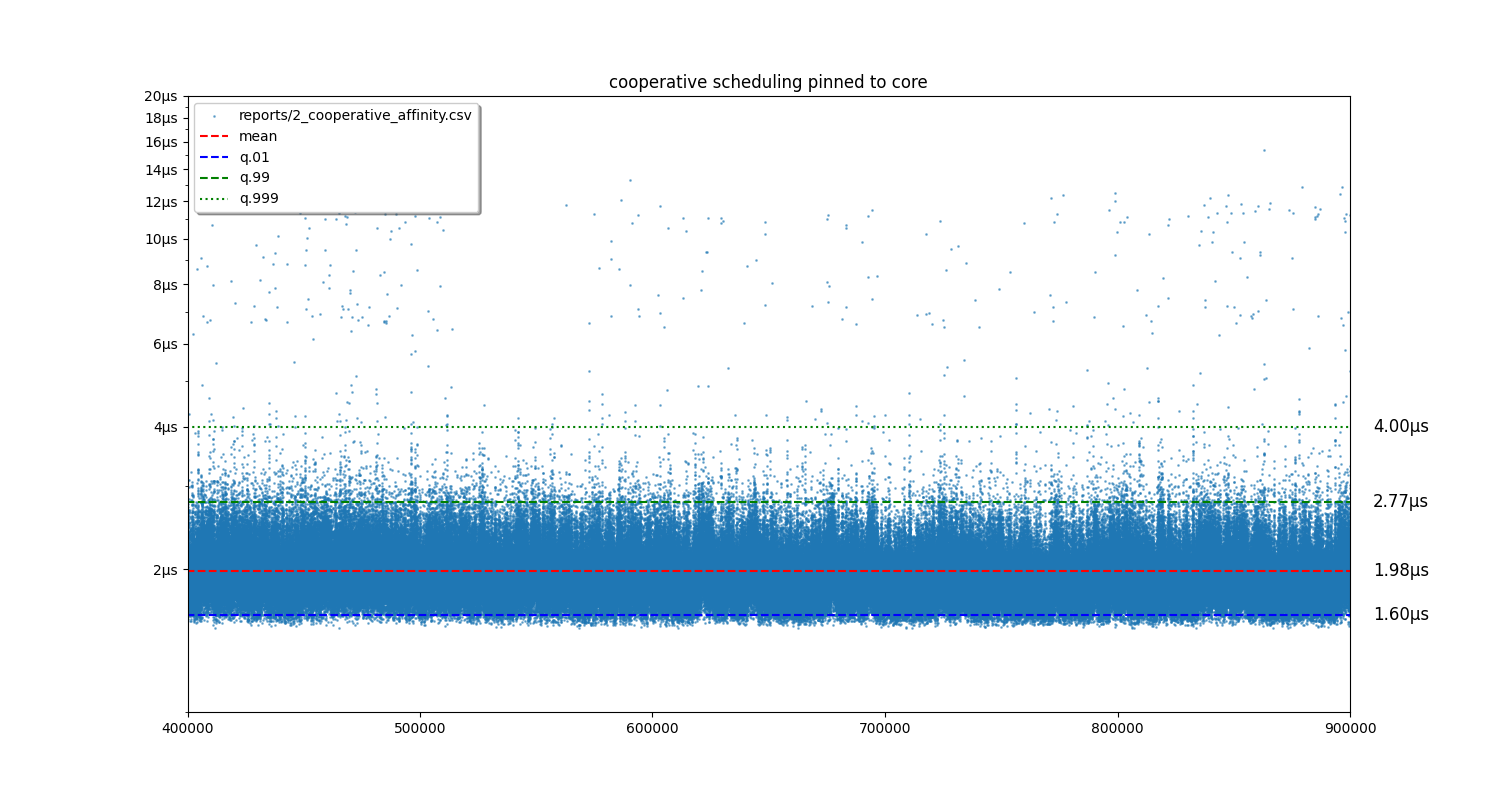

In [5]:
fig, ax = subplots(1,1,figsize=(15,8), sharey=True)

report(glob.glob("reports/2*affinity.csv"), ax)
ax.set_title("cooperative scheduling pinned to core")

Text(0.5, 1.0, 'cooperative scheduling pinned to core')

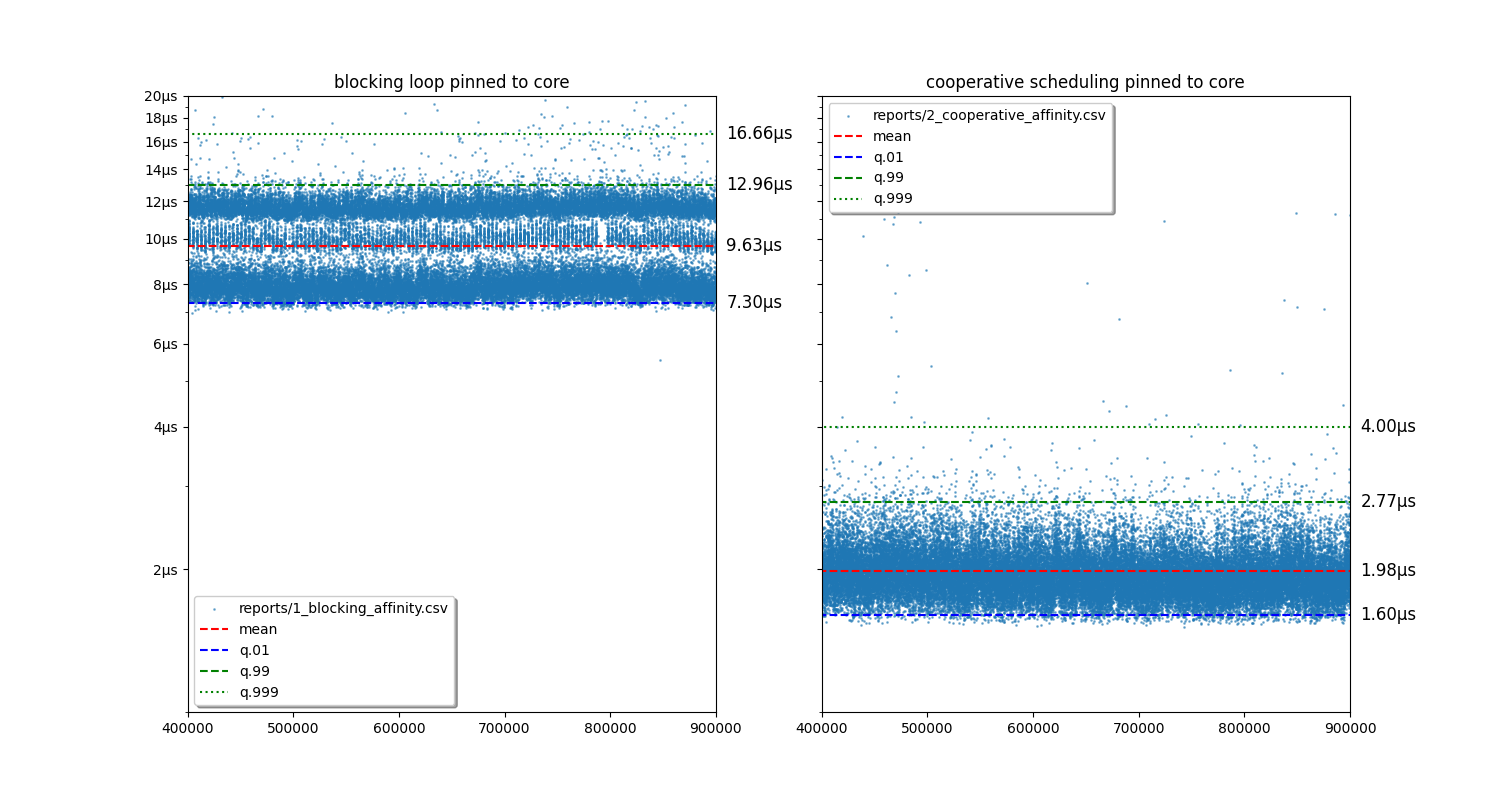

In [6]:
fig, ax = subplots(1,2,figsize=(15,8), sharey=True)

report(glob.glob("reports/1*blocking_affinity.csv"), ax[0], legend_loc='lower left', SKIP=10)
ax[0].set_title("blocking loop pinned to core")
report(glob.glob("reports/2*affinity.csv"), ax[1], SKIP=10)
ax[1].set_title("cooperative scheduling pinned to core")

Text(0.5, 1.0, 'busy loop pinned to core')

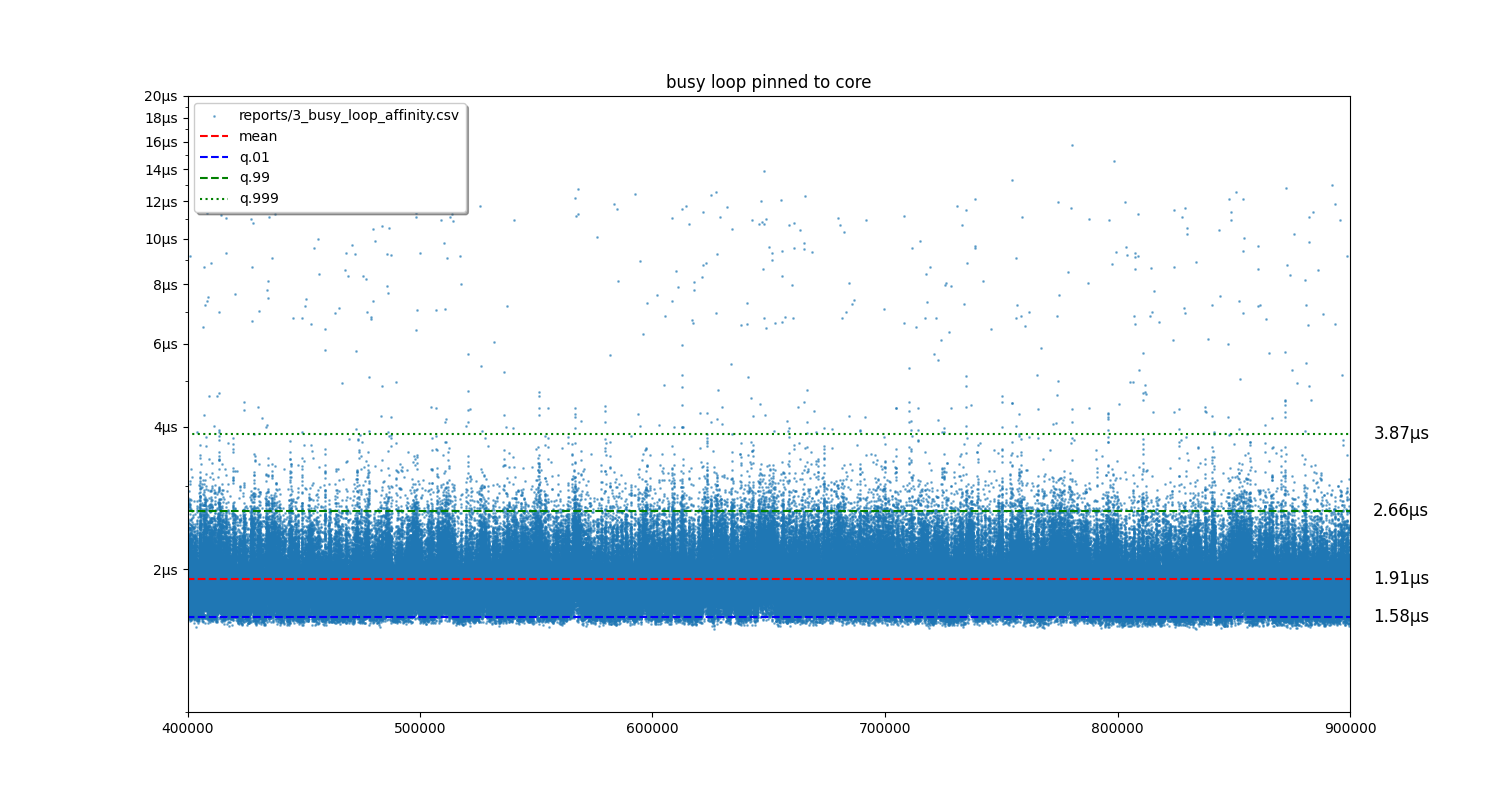

In [7]:
fig, ax = subplots(1,1,figsize=(15,8), sharey=True)

report(glob.glob("reports/3*affinity.csv"), ax)
ax.set_title("busy loop pinned to core")

Text(0.5, 1.0, 'busy loop pinned to core')

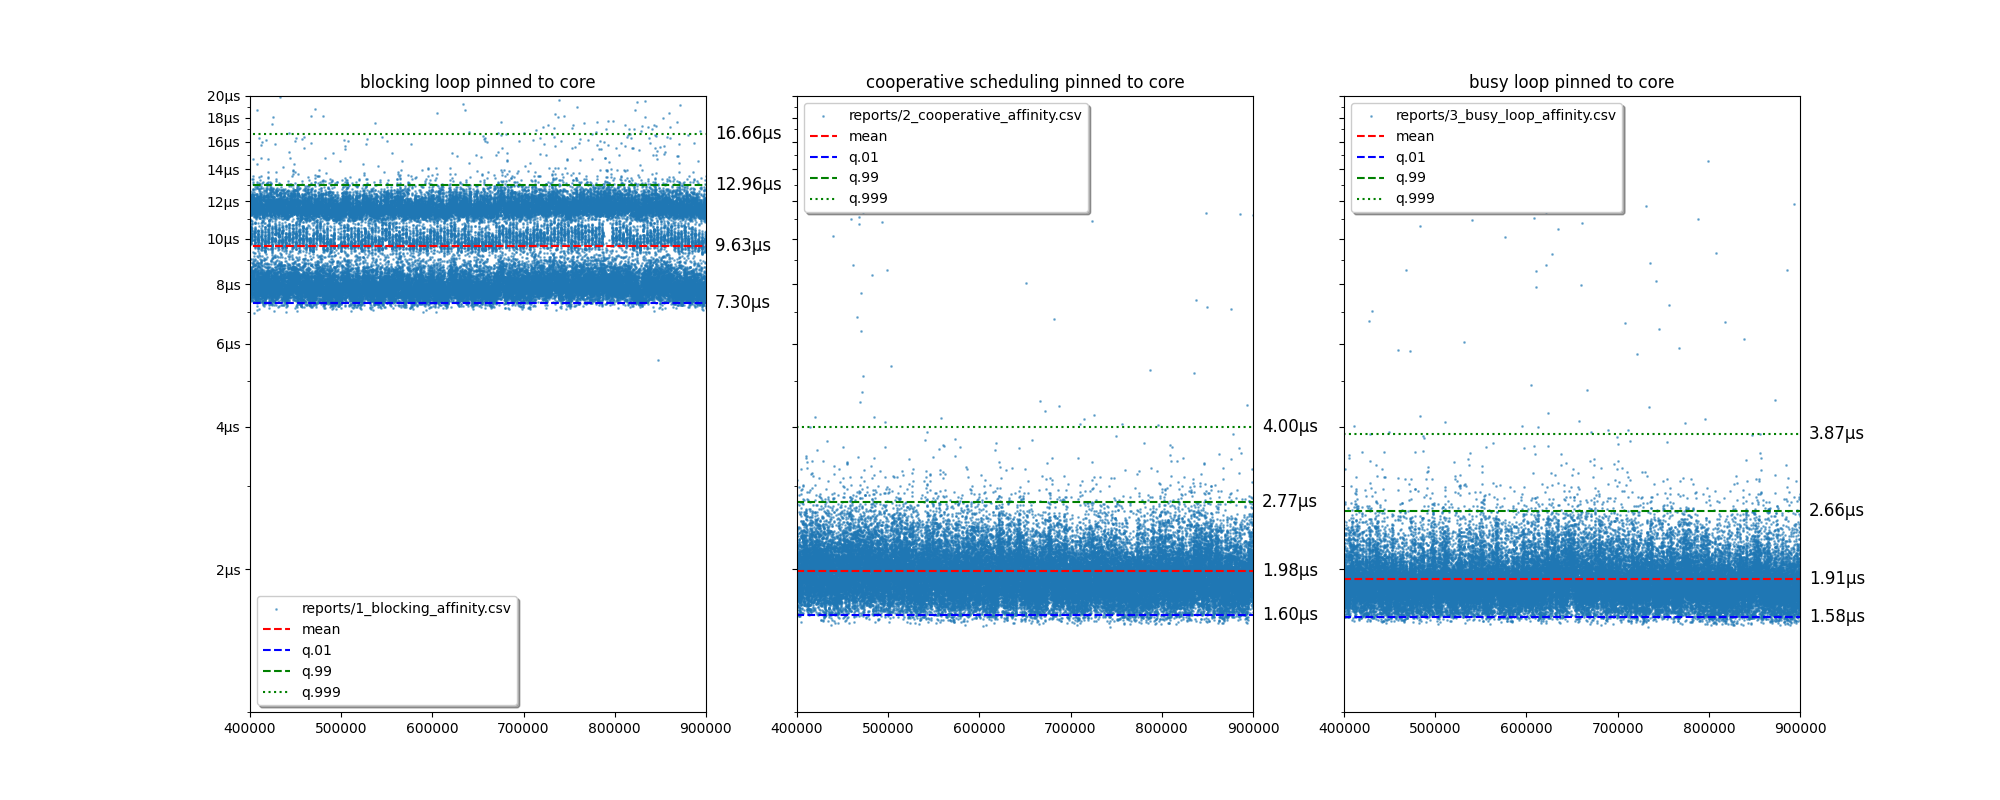

In [8]:
fig, ax = subplots(1,3,figsize=(20,8), sharey=True)

report(glob.glob("reports/1*blocking_affinity.csv"), ax[0], legend_loc='lower left', SKIP=10)
ax[0].set_title("blocking loop pinned to core")
report(glob.glob("reports/2*affinity.csv"), ax[1], SKIP=10)
ax[1].set_title("cooperative scheduling pinned to core")
report(glob.glob("reports/3*affinity.csv"), ax[2], SKIP=10)
ax[2].set_title("busy loop pinned to core")